In [1]:
import os
os.chdir('/home/jaentrouble/hrnet_pretrain')
print(os.getcwd())

/home/jaentrouble/hrnet_pretrain


In [2]:
%matplotlib inline

In [3]:
!git pull

remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (2/2), done.
Unpacking objects:  50% (2/4)remote: Total 4 (delta 2), reused 4 (delta 2), pack-reused 0
Unpacking objects: 100% (4/4), 520.16 KiB | 641.00 KiB/s, done.
From https://github.com/jaentrouble/hrnet_pretrain
   5fac552..d0185de  master     -> origin/master
Updating 5fac552..d0185de
Fast-forward
 check_dataset.ipynb | 86 +++++++++++++++++++++++++----------------------------
 model_trainer.py    |  1 +
 2 files changed, 41 insertions(+), 46 deletions(-)


In [4]:
from model_trainer import create_train_dataset

In [5]:
img_dir = '/home/jaentrouble/data/imagenet/train'
img_names = os.listdir(img_dir)

In [6]:
import json

In [7]:
with open('meta.json','r') as f:
    label_dict=json.load(f)

In [8]:
with open('id_to_name.json','r') as f:
    names = json.load(f)

In [9]:
img_size = (240,320)
ds = create_train_dataset(
    img_dir,
    img_names,
    label_dict,
    img_size,
    32,
    buffer_size=1000,
)

In [10]:
sample = ds.take(5).as_numpy_iterator()

In [11]:
import matplotlib.pyplot as plt

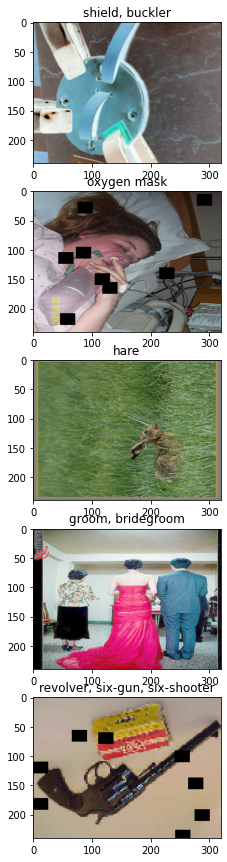

In [12]:
fig = plt.figure(figsize=(15,15))
for i, s in enumerate(sample):
    ax = fig.add_subplot(5,1,i+1)
    img = s[0][0]
    ax.imshow(img)
    ax.title.set_text(names[s[1][0]])
plt.show()

In [13]:
with open('val_label.json','r') as f:
    val_label = json.load(f)

In [14]:
from model_trainer import imagenet_val_dataset
val_dir = '/home/jaentrouble/data/imagenet/valid'
val_ds = imagenet_val_dataset(val_dir, val_label, img_size, 32)

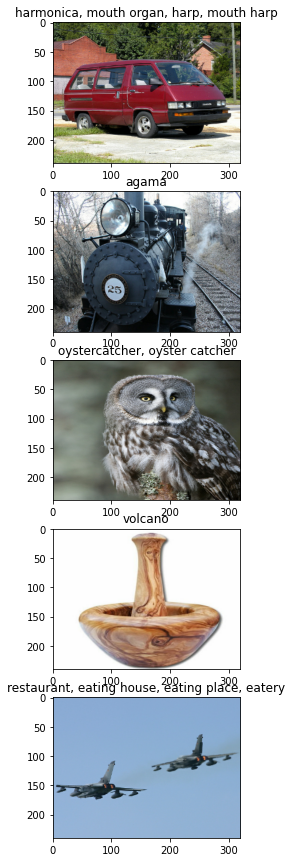

In [15]:
sample = val_ds.take(5).as_numpy_iterator()
fig = plt.figure(figsize=(15,15))
for i, s in enumerate(sample):
    ax = fig.add_subplot(5,1,i+1)
    img = s[0][0]
    ax.imshow(img)
    ax.title.set_text(names[s[1][0]])
plt.show()

In [17]:
os.listdir(val_dir)[:10]

['ILSVRC2012_val_00026512.JPEG',
 'ILSVRC2012_val_00021100.JPEG',
 'ILSVRC2012_val_00011588.JPEG',
 'ILSVRC2012_val_00028427.JPEG',
 'ILSVRC2012_val_00047879.JPEG',
 'ILSVRC2012_val_00012095.JPEG',
 'ILSVRC2012_val_00048994.JPEG',
 'ILSVRC2012_val_00033719.JPEG',
 'ILSVRC2012_val_00015635.JPEG',
 'ILSVRC2012_val_00042950.JPEG']